In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#1. Считайте файл
anime_df = pd.read_csv('anime.csv')
#2. Выведите первые 10 строк датафрейма
print(anime_df.head(20).to_string())

                               Title      Production Episodes       Source                                     Genre                    Airdate  Rating     Voters                              Theme
0                 Shingeki no Kyojin      Wit Studio       25        Manga              Action,Drama,Fantasy,Mystery   Apr 7, 2013, 01:58 (JST)    8.52  3,142,121               Military,Super Power
1   Fullmetal Alchemist: Brotherhood           Bones       64        Manga     Action,Adventure,Comedy,Drama,Fantasy   Apr 5, 2009, 17:00 (JST)    9.16  2,676,911                           Military
2                   Sword Art Online    A-1 Pictures       25  Light novel          Action,Adventure,Fantasy,Romance   Jul 8, 2012, 00:00 (JST)    7.20  2,586,628                               Game
3                      One Punch Man        Madhouse       12    Web manga         Action,Comedy,Sci-Fi,Supernatural   Oct 5, 2015, 01:05 (JST)    8.52  2,583,068                 Parody,Super Power
4         

In [33]:
#3. Выведите информацию о столбцах
print(anime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1992 non-null   object 
 1   Production  1992 non-null   object 
 2   Episodes    1992 non-null   object 
 3   Source      1992 non-null   object 
 4   Genre       1992 non-null   object 
 5   Airdate     1020 non-null   object 
 6   Rating      1944 non-null   float64
 7   Voters      1992 non-null   object 
 8   Theme       1992 non-null   object 
dtypes: float64(1), object(8)
memory usage: 140.2+ KB
None


In [34]:
#4. Приведите названия столбцов к единому виду
# нижний регистр и "_" вместо пробелов
anime_df['New column'] = None
columns = anime_df.columns
print(*columns)
modified_columns = []
for column in columns:
    modified_column = ''
    for character in column:
        if character == ' ':
            modified_column += '_'
        else:
            modified_column += character
            
    modified_columns.append(modified_column.casefold())

anime_df.columns = modified_columns
print(*anime_df.columns)

Title Production Episodes Source Genre Airdate Rating Voters Theme New column
title production episodes source genre airdate rating voters theme new_column


In [35]:
#5. Для каждого столбца с числами построить статистики
anime_df.episodes = pd.to_numeric(anime_df.episodes, errors='coerce')
print(anime_df.describe())

          episodes       rating
count  1939.000000  1944.000000
mean     14.975245     7.150849
std      28.116711     0.709454
min       1.000000     2.960000
25%       1.000000     6.720000
50%      12.000000     7.210000
75%      13.000000     7.590000
max     500.000000     9.160000


In [36]:
#6. Для каждого из столбцов, содержащих категориальные значения, 
# вывести все возможные значения с количеством их повторений
#Column = "Production"
print(anime_df.production.value_counts().to_string())

Toei Animation                                  130
Sunrise                                         125
Madhouse                                         83
A-1 Pictures                                     78
Bones                                            73
Production I.G                                   72
Studio Pierrot                                   68
Studio Deen                                      62
J.C.Staff                                        58
OLM                                              49
Gonzo                                            48
TMS Entertainment                                45
-                                                39
Xebec                                            33
ufotable                                         33
Arms                                             29
Satelight                                        28
AIC                                              27
Wit Studio                                       27
8bit        

In [37]:
#Column = "Source"
print(anime_df.source.value_counts().to_string())

Manga           818
Original        468
Light novel     263
Game            201
Novel            61
Visual novel     51
Other            48
-                39
Web manga        32
Card game         9
Book              1
Picture book      1


In [38]:
#7. Заполните пропуски в данных
series = anime_df.production
series = series.where(series != '-', 'Unknown')
anime_df.production = series
anime_df = anime_df.sort_values('production')
print(anime_df.to_string())

                                                                                                                            title                                    production  episodes        source                                                              genre                    airdate  rating     voters                                          theme new_column
1228                                                                                                                 Busou Shinki                                          8bit      12.0         Other                                        Action,Sci-Fi,Slice of Life   Oct 5, 2012, 01:55 (JST)    6.31     34,980                                          Mecha       None
648                                                                      IS: Infinite Stratos Encore - Koi ni Kogareru Rokujuusou                                          8bit       1.0   Light novel                                         Action,Comedy,Sci-

In [39]:
series = anime_df.source
series = series.where(series != '-', 'Unknown')
anime_df.source = series
anime_df = anime_df.sort_values('source')
print(anime_df.to_string())

                                                                                                                            title                                    production  episodes        source                                                              genre                    airdate  rating     voters                                          theme new_column
1307                                                                                          Fuse: Teppou Musume no Torimonochou                             TMS Entertainment       1.0          Book                                          Action,Drama,Supernatural                        NaN    7.34     30,358                                     Historical       None
705                                                                                                                  Luck & Logic                                     Doga Kobo      12.0     Card game                                                     Action

In [40]:
anime_df = anime_df.sort_values('episodes')
anime_df.episodes = anime_df.episodes.fillna("Unknown")
print(anime_df.to_string())

                                                                                                                            title                                    production episodes        source                                                              genre                    airdate  rating     voters                                          theme new_column
1307                                                                                          Fuse: Teppou Musume no Torimonochou                             TMS Entertainment      1.0          Book                                          Action,Drama,Supernatural                        NaN    7.34     30,358                                     Historical       None
790                                                                                                              FLCL Alternative                                           Nut      1.0      Original                                   Action,Avant Garde,Comedy,S

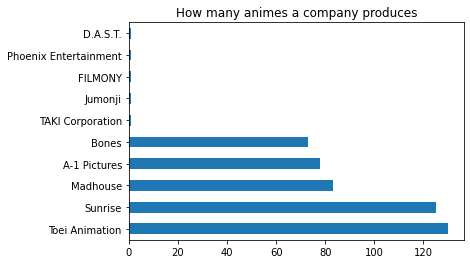

In [41]:
#8.a
anime_companies = anime_df.production.value_counts()
biggest = anime_companies.iloc[0:5]
smallest = anime_companies.iloc[-6:-1]
result = pd.concat([biggest, smallest])
ax = result.plot.barh(title = "How many animes a company produces")
plt.show()

1.0      625
12.0     385
13.0     158
24.0      97
26.0      95
        ... 
93.0       1
94.0       1
100.0      1
103.0      1
58.0       1
Name: episodes, Length: 100, dtype: int64


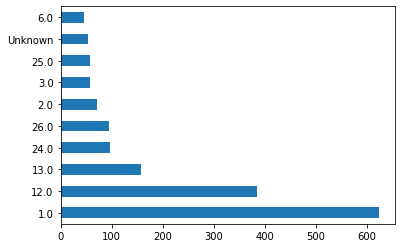

In [42]:
#8.b
numberOfEpisodes = anime_df.episodes.value_counts()
print(numberOfEpisodes)
biggest = numberOfEpisodes.iloc[0:10]
biggest.plot.barh()
plt.show()

Manga           818
Original        468
Light novel     263
Game            201
Novel            61
Visual novel     51
Other            48
Unknown          39
Web manga        32
Card game         9
Book              1
Picture book      1
Name: source, dtype: int64


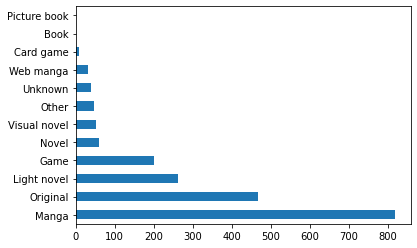

In [43]:
#8.c
sources = anime_df.source.value_counts()
print(sources)
sources.plot.barh()
plt.show()

                      company  average_rating
145           B.CMAY PICTURES           8.400
45      Bandai Namco Pictures           8.335
76              Studio Ghibli           8.325
123  China Literature Limited           8.260
27             Yumeta Company           8.180
..                        ...             ...
201                    Gambit           3.700
173             Visual Flight           2.960
220                   HORNETS             NaN
221                        OZ             NaN
223       Bibury Animation CG             NaN

[224 rows x 2 columns]


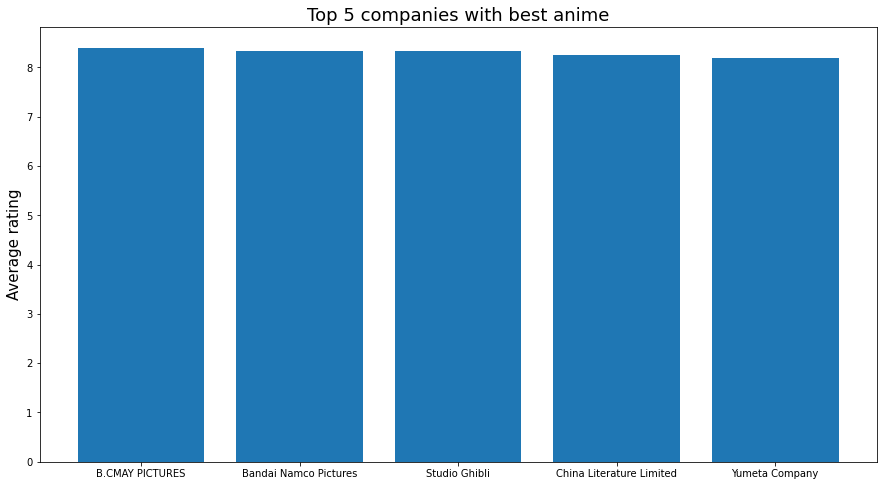

In [44]:
#9
rating = pd.Series(float)
companies = anime_df.production.drop_duplicates()
my_list = []
for company in companies:
    rating = anime_df.query("production == @company").rating
    mean = rating.mean()
    my_list.append([company, mean])

df = pd.DataFrame(my_list,columns=['company', 'average_rating'])
df = df.sort_values('average_rating', ascending=False)
print(df)
df = df.iloc[0:5]
fig, ax = plt.subplots(figsize = (15,8))
ax.bar(df.company, df.average_rating)
ax.set_ylabel("Average rating", size = 15)
ax.set_title("Top 5 companies with best anime", size = 18)
plt.show()